# Problem Statement

Welcome to your first week of work at the Disease And Treatment Agency, division of Societal Cures In Epidemiology and New Creative Engineering (DATA-SCIENCE). Time to get to work!

Due to the recent epidemic of West Nile Virus in the Windy City, we've had the Department of Public Health set up a surveillance and control system. We're hoping it will let us learn something from the mosquito population as we collect data over time. Pesticides are a necessary evil in the fight for public health and safety, not to mention expensive! We need to derive an effective plan to deploy pesticides throughout the city, and that is exactly where you come in!

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
%matplotlib inline

In [2]:
train = pd.read_csv('./assets/train.csv')
test = pd.read_csv('./assets/test.csv')
weather = pd.read_csv('./assets/weather.csv')
spray = pd.read_csv('./assets/spray.csv')

## Functions

In [3]:
def clean_data(row):
    if ('M' in row) | ('T' in row):
        row = np.nan
    return row

In [4]:
train.columns = train.columns.str.lower()
test.columns = test.columns.str.lower()
weather.columns = weather.columns.str.lower()
spray.columns = spray.columns.str.lower()

In [5]:
train.head()

,date,address,species,block,street,trap,addressnumberandstreet,latitude,longitude,addressaccuracy,nummosquitos,wnvpresent
0,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0
1,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0
2,2007-05-29,"6200 North Mandell Avenue, Chicago, IL 60646, USA",CULEX RESTUANS,62,N MANDELL AVE,T007,"6200 N MANDELL AVE, Chicago, IL",41.994991,-87.769279,9,1,0
3,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX PIPIENS/RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,1,0
4,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,4,0


In [6]:
train.isnull().sum()

date                      0
address                   0
species                   0
block                     0
street                    0
trap                      0
addressnumberandstreet    0
latitude                  0
longitude                 0
addressaccuracy           0
nummosquitos              0
wnvpresent                0
dtype: int64

In [7]:
test.isnull().sum()

id                        0
date                      0
address                   0
species                   0
block                     0
street                    0
trap                      0
addressnumberandstreet    0
latitude                  0
longitude                 0
addressaccuracy           0
dtype: int64

In [8]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2944 entries, 0 to 2943
Data columns (total 22 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   station      2944 non-null   int64  
 1   date         2944 non-null   object 
 2   tmax         2944 non-null   int64  
 3   tmin         2944 non-null   int64  
 4   tavg         2944 non-null   object 
 5   depart       2944 non-null   object 
 6   dewpoint     2944 non-null   int64  
 7   wetbulb      2944 non-null   object 
 8   heat         2944 non-null   object 
 9   cool         2944 non-null   object 
 10  sunrise      2944 non-null   object 
 11  sunset       2944 non-null   object 
 12  codesum      2944 non-null   object 
 13  depth        2944 non-null   object 
 14  water1       2944 non-null   object 
 15  snowfall     2944 non-null   object 
 16  preciptotal  2944 non-null   object 
 17  stnpressure  2944 non-null   object 
 18  sealevel     2944 non-null   object 
 19  result

In [9]:
weather['sunrise']

0       0448
1          -
2       0447
3          -
4       0446
        ... 
2939       -
2940    0622
2941       -
2942    0623
2943       -
Name: sunrise, Length: 2944, dtype: object

In [10]:
spray.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14835 entries, 0 to 14834
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       14835 non-null  object 
 1   time       14251 non-null  object 
 2   latitude   14835 non-null  float64
 3   longitude  14835 non-null  float64
dtypes: float64(2), object(2)
memory usage: 463.7+ KB


In [11]:
train['species'].unique()

array(['CULEX PIPIENS/RESTUANS', 'CULEX RESTUANS', 'CULEX PIPIENS',
       'CULEX SALINARIUS', 'CULEX TERRITANS', 'CULEX TARSALIS',
       'CULEX ERRATICUS'], dtype=object)

In [12]:
train['trap'].unique()

array(['T002', 'T007', 'T015', 'T045', 'T046', 'T048', 'T049', 'T050',
       'T054', 'T086', 'T091', 'T094', 'T096', 'T129', 'T143', 'T148',
       'T153', 'T159', 'T009', 'T011', 'T016', 'T019', 'T025', 'T028',
       'T031', 'T033', 'T089', 'T090', 'T092', 'T135', 'T141', 'T142',
       'T145', 'T146', 'T147', 'T149', 'T150', 'T151', 'T152', 'T154',
       'T158', 'T162', 'T218', 'T220', 'T001', 'T003', 'T006', 'T008',
       'T012', 'T034', 'T037', 'T040', 'T043', 'T047', 'T051', 'T085',
       'T088', 'T161', 'T219', 'T013', 'T014', 'T018', 'T030', 'T084',
       'T144', 'T160', 'T005', 'T017', 'T044', 'T095', 'T004', 'T035',
       'T036', 'T039', 'T060', 'T061', 'T062', 'T065', 'T066', 'T067',
       'T069', 'T070', 'T071', 'T073', 'T074', 'T075', 'T076', 'T077',
       'T079', 'T080', 'T081', 'T082', 'T083', 'T114', 'T155', 'T063',
       'T115', 'T138', 'T200', 'T206', 'T209', 'T212', 'T215', 'T107',
       'T128', 'T072', 'T078', 'T097', 'T099', 'T100', 'T102', 'T103',
      

In [13]:
train_longs = train['longitude']
train_lats = train['latitude']

spray_longs = spray['longitude']
spray_lats = spray['latitude']

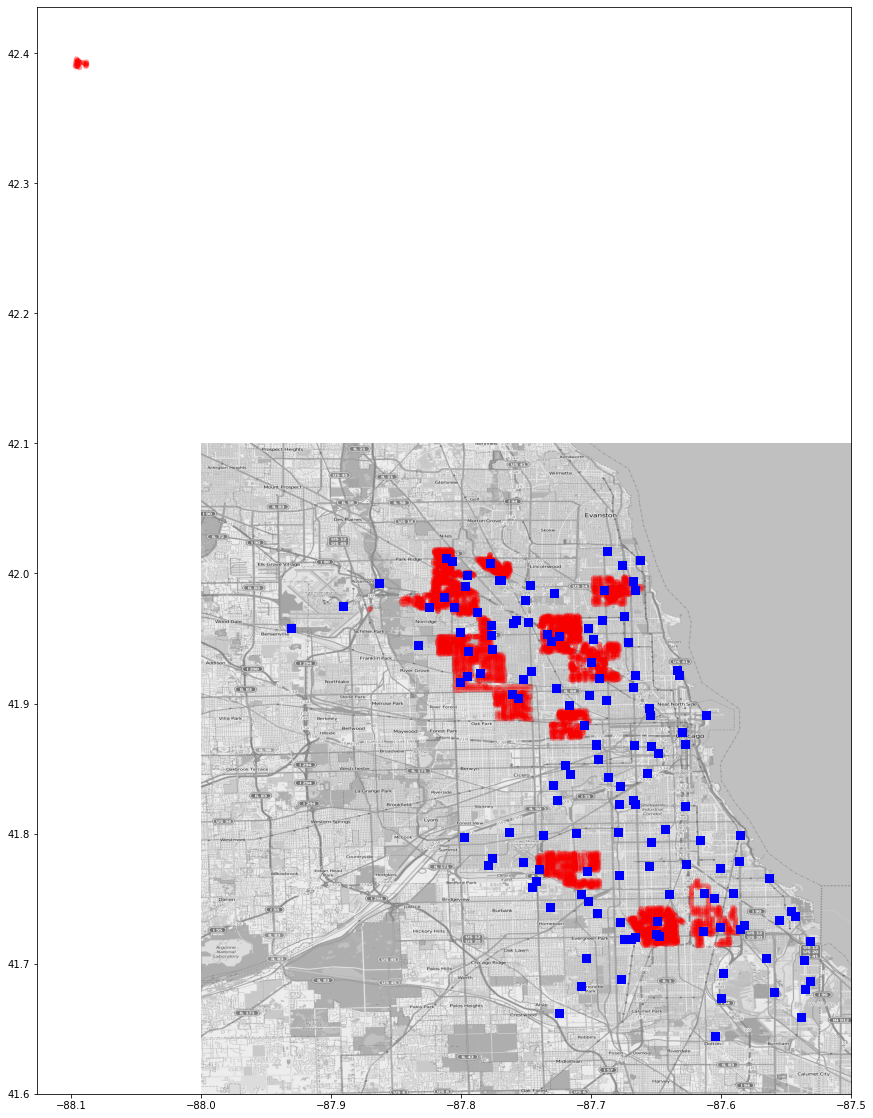

In [32]:
plt.figure(figsize=(15,20))
origin = [41.6, -88.0]              # lat/long of origin (lower left corner)
upperRight = [42.1, -87.5]          # lat/long of upper right corner

mapdata = np.loadtxt("./assets/mapdata_copyright_openstreetmap_contributors.txt")

intersection = [41.909614, -87.746134]  # co-ordinates of intersection of IL64 / IL50 according to Google Earth


# generate plot
plt.imshow(mapdata, cmap=plt.get_cmap('gray'), extent=[origin[1], upperRight[1], origin[0], upperRight[0]])
plt.scatter(x=spray_longs, y=spray_lats, c='r', s=20, alpha = 0.1)
plt.scatter(x=train_longs, y=train_lats, c='b', s=60, marker='s')

#plt.show()
plt.savefig('map.png')

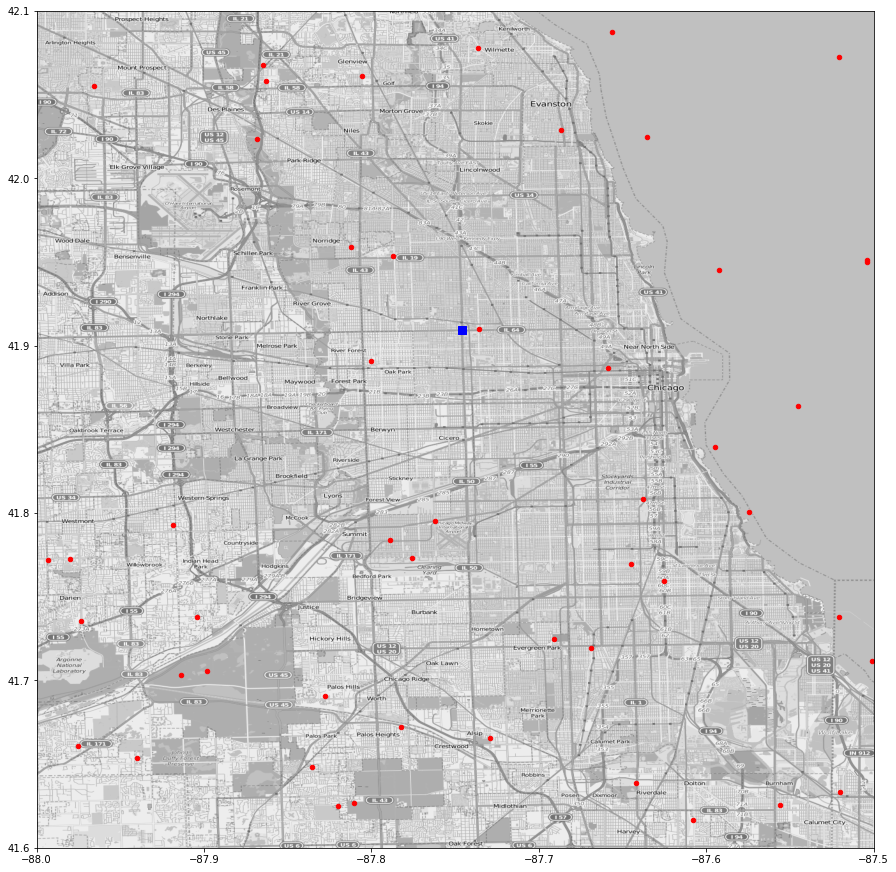

In [30]:
plt.figure(figsize=(15,20))
origin = [41.6, -88.0]              # lat/long of origin (lower left corner)
upperRight = [42.1, -87.5]          # lat/long of upper right corner

mapdata = np.loadtxt("./assets/mapdata_copyright_openstreetmap_contributors.txt")


# generate some data to overlay
numPoints = 50
lats = (upperRight[0] - origin[0]) * np.random.random_sample(numPoints) + origin[0]
longs = (upperRight[1] - origin[1]) * np.random.random_sample(numPoints) + origin[1]

intersection = [41.909614, -87.746134]  # co-ordinates of intersection of IL64 / IL50 according to Google Earth


# generate plot
plt.imshow(mapdata, cmap=plt.get_cmap('gray'), extent=[origin[1], upperRight[1], origin[0], upperRight[0]])
plt.scatter(x=longs, y=lats, c='r', s=20)
plt.scatter(x=intersection[1], y=intersection[0], c='b', s=60, marker='s')

#plt.show()
plt.savefig('map.png')

In [16]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10506 entries, 0 to 10505
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   date                    10506 non-null  object 
 1   address                 10506 non-null  object 
 2   species                 10506 non-null  object 
 3   block                   10506 non-null  int64  
 4   street                  10506 non-null  object 
 5   trap                    10506 non-null  object 
 6   addressnumberandstreet  10506 non-null  object 
 7   latitude                10506 non-null  float64
 8   longitude               10506 non-null  float64
 9   addressaccuracy         10506 non-null  int64  
 10  nummosquitos            10506 non-null  int64  
 11  wnvpresent              10506 non-null  int64  
dtypes: float64(2), int64(4), object(6)
memory usage: 985.1+ KB


In [17]:
train['date'] = pd.to_datetime(train['date'])

In [18]:
train['day'] = train['date'].dt.day
train['month'] = train['date'].dt.month
train['year'] = train['date'].dt.year

In [19]:
weather['date'] = pd.to_datetime(weather['date'])
weather['day'] = weather['date'].dt.day
weather['month'] = weather['date'].dt.month
weather['year'] = weather['date'].dt.year

In [20]:
spray['date'] = pd.to_datetime(spray['date'])
spray['day'] = spray['date'].dt.day
spray['month'] = spray['date'].dt.month
spray['year'] = spray['date'].dt.year

In [21]:
weather['water1'].value_counts()

M    2944
Name: water1, dtype: int64

In [22]:
weather = weather.drop(columns = 'water1')

In [23]:
check_list = ['tavg', 'dewpoint', 'wetbulb', 'heat', 'cool', 'depart', 'snowfall', 'depth', 'sealevel', 
            'resultspeed', 'resultdir', 'preciptotal', 'stnpressure', 'stnpressure', 'avgspeed']

In [24]:
col_to_clean = [col for col in weather.columns if 'M' in weather[col].unique() or 'T' in weather[col].unique()]
print(f'columns with M or T: {col_to_clean}')
for col in col_to_clean:
    weather[col] = weather[col].apply(clean_data)

columns with M or T: ['tavg', 'depart', 'wetbulb', 'heat', 'cool', 'depth', 'snowfall', 'preciptotal', 'stnpressure', 'sealevel', 'avgspeed']


<ipython-input-24-1affb4d47b17>:1: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  col_to_clean = [col for col in weather.columns if 'M' in weather[col].unique() or 'T' in weather[col].unique()]


In [27]:
num_list = col_to_clean.append(['resultspeed', 'resultdir'])
for col in num_list:
    pd.to_numeric(weather[col])

TypeError: 'NoneType' object is not iterable

In [26]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2944 entries, 0 to 2943
Data columns (total 24 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   station      2944 non-null   int64         
 1   date         2944 non-null   datetime64[ns]
 2   tmax         2944 non-null   int64         
 3   tmin         2944 non-null   int64         
 4   tavg         2933 non-null   object        
 5   depart       1472 non-null   object        
 6   dewpoint     2944 non-null   int64         
 7   wetbulb      2940 non-null   object        
 8   heat         2933 non-null   object        
 9   cool         2933 non-null   object        
 10  sunrise      2944 non-null   object        
 11  sunset       2944 non-null   object        
 12  codesum      2944 non-null   object        
 13  depth        1472 non-null   object        
 14  snowfall     1460 non-null   object        
 15  preciptotal  2624 non-null   object        
 16  stnpre

# Data Cleaning

# Exploratory Data Analysis

# Modelling

# Conclusion